# 보스톤 집값 예측

## 패키지 로딩

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('dataset/HousingData.csv')
df =df.rename({'MEDV': 'PRICE'}, axis =1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
df = df.fillna(0)

## 학습 몇 평가 데이터 분할

In [25]:
scaled_data = StandardScaler().fit_transform(df[df.columns[:13]])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['PRICE'],test_size=0.3,random_state=10)

## 알파값 변화에 따른 회귀계수 및 상관계수 값 계산
- 알파값은 규제 강도를 제어하는 상수로 [0,ift) 범위의 부동 소수점 값을 사용할 수 있다.
- 알파값이 0이면 LinearRegression에서 사용하는 일반적인 최소제곱법과 같아진다.

In [37]:
def regulation_compare(alpha,model_name):
    df2 = pd.DataFrame()
    for a in alpha:
        print('회귀모형: ',model_name)
        print('알파값: ', a)

        if model_name == 'Ridge':
            model = Ridge(alpha=a)
        elif model_name == 'Lasso':
            model = Lasso(alpha=a)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=a, l1_ratio=0.5)

        model.fit (X_train,y_train)
        r_square = model.score(X_test,y_test)
        print(f'결정계수: {r_square:.3f}')
        weight = { f:w for f,w in zip(df.columns.values[:13], model.coef_)}

        y_hat = model.predict(X_test)
        mse = mean_squared_error(y_test,y_hat)
        rmse = np.sqrt(mse)
        print(f'RMSE: {rmse:.3f}')
        print('-'*50)

        df2['alpha = '+str(a)] = pd.Series(weight)

    return(df2)

## 라쏘 회귀모델 생성(L1 규제)

In [30]:
alpha = [0.07,0.1,0.5,1.3]
regulation_compare(alpha,'Lasso')

회귀모형:  Lasso
알파값:  0.07
결정계수: 0.683
RMSE: 5.560
--------------------------------------------------
회귀모형:  Lasso
알파값:  0.1
결정계수: 0.681
RMSE: 5.579
--------------------------------------------------
회귀모형:  Lasso
알파값:  0.5
결정계수: 0.640
RMSE: 5.931
--------------------------------------------------
회귀모형:  Lasso
알파값:  1.3
결정계수: 0.603
RMSE: 6.225
--------------------------------------------------


,alpha = 0.07,alpha = 0.1,alpha = 0.5,alpha = 1.3
CRIM,-1.119571,-1.033455,-0.476296,-0.000000
ZN,1.147513,1.065906,0.116373,0.000000
INDUS,-0.497514,-0.501637,-0.000000,-0.000000
CHAS,0.468979,0.452339,0.077519,0.000000
NOX,-1.283981,-1.150326,-0.000000,-0.000000
RM,2.842994,2.883823,3.081812,2.466994
AGE,-0.262196,-0.214871,-0.000000,-0.000000
DIS,-2.684985,-2.465234,-0.000000,0.000000
RAD,1.363663,0.964749,-0.000000,-0.000000
TAX,-1.043953,-0.720223,-0.009781,-0.087304


## 릿지 회귀모형 생성(L2 규제)

In [31]:
alpha = [0,1,5,10,100]
regulation_compare(alpha, 'Ridge')

회귀모형:  Ridge
알파값:  0
결정계수: 0.685
RMSE: 5.544
--------------------------------------------------
회귀모형:  Ridge
알파값:  1
결정계수: 0.685
RMSE: 5.544
--------------------------------------------------
회귀모형:  Ridge
알파값:  5
결정계수: 0.685
RMSE: 5.546
--------------------------------------------------
회귀모형:  Ridge
알파값:  10
결정계수: 0.684
RMSE: 5.551
--------------------------------------------------
회귀모형:  Ridge
알파값:  100
결정계수: 0.660
RMSE: 5.761
--------------------------------------------------


,alpha = 0,alpha = 1,alpha = 5,alpha = 10,alpha = 100
CRIM,-1.321626,-1.308093,-1.259563,-1.208605,-0.830642
ZN,1.339011,1.323092,1.266392,1.207708,0.828199
INDUS,-0.487958,-0.496477,-0.521852,-0.540295,-0.518813
CHAS,0.507577,0.510667,0.521028,0.530718,0.556730
NOX,-1.596511,-1.568779,-1.467592,-1.359598,-0.669541
RM,2.746672,2.753965,2.776782,2.794321,2.581376
AGE,-0.372163,-0.371530,-0.368852,-0.365447,-0.341037
DIS,-3.198911,-3.156293,-2.997565,-2.821894,-1.380229
RAD,2.299825,2.224920,1.970167,1.725238,0.460996
TAX,-1.803650,-1.737931,-1.520642,-1.322384,-0.585863


## 엘라스틱 회귀모델 생성(L1 + L2 규제)


In [38]:
alpha = [0,1,5,10,100]
regulation_compare(alpha,'ElasticNet')

회귀모형:  ElasticNet
알파값:  0
결정계수: 0.685
RMSE: 5.544
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  1
결정계수: 0.589
RMSE: 6.338
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  5
결정계수: 0.247
RMSE: 8.572
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  10
결정계수: 0.004
RMSE: 9.859
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  100
결정계수: -0.036
RMSE: 10.056
--------------------------------------------------


,alpha = 0,alpha = 1,alpha = 5,alpha = 10,alpha = 100
CRIM,-1.321626,-0.451144,-0.000000,-0.000000,-0.0
ZN,1.339011,0.419320,0.112965,0.000000,0.0
INDUS,-0.487958,-0.275460,-0.163758,-0.000000,-0.0
CHAS,0.507577,0.199585,0.000000,0.000000,0.0
NOX,-1.596511,-0.218155,-0.126030,-0.000000,-0.0
RM,2.746672,2.182317,0.691834,0.083567,0.0
AGE,-0.372163,-0.043958,-0.000000,-0.000000,-0.0
DIS,-3.198911,-0.000000,0.000000,0.000000,0.0
RAD,2.299825,-0.000000,-0.000000,-0.000000,-0.0
TAX,-1.803650,-0.389084,-0.231575,-0.000000,-0.0


# 대한민국 육군 몸무게 예측하기
- Seq: 일련번호 삭제
- Chest : 가숨둘레
- Height : 키
- Waist : 허리둘레
- Head : 머리둘레
- Foot : 발 길이
- Weight : 몸무게(종속변수)

In [64]:
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv('Army-Dataset.csv')
df.drop('Seq',axis=1,inplace=True)
df

,Chest,Height,Waist,Head,Foot,Weight
0,96.3,185.5,82.5,57.1,28.5,73.2
1,101.9,167.2,81.2,55.0,24.2,65.1
2,99.5,179.9,99.2,56.3,28.1,93.2
3,98.6,171.4,85.9,54.5,27.4,71.6
4,94.7,176.9,78.3,58.5,26.5,67.1
...,...,...,...,...,...,...
59991,88.1,178.5,74.4,56.9,27.0,61.3
59992,88.7,168.0,78.6,56.2,25.7,60.2
59993,80.4,176.5,66.6,56.4,24.8,46.7
59994,85.3,169.7,70.6,60.0,24.7,53.7


In [82]:
scaled_data = StandardScaler().fit_transform(df[df.columns[:6]])


In [83]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,df['Weight'],test_size=0.3,random_state=10)

In [84]:
# 알파값 변화에 따른 모델 성능변화 시각화
ridge_result = []
lasso_result = []
alpha = [0.001,0.01,0.1,1,5,7,10,30]

from sklearn.metrics import r2_score

for a in alpha: 
    ridge = Ridge(alpha=a)
    lasso = Ridge(alpha=a)
    
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)

    ridge_y_hat = ridge.predict(X_test)
    lasso_y_hat = lasso.predict(X_test)

    ridge_r2, lasso_r2 = r2_score(y_test,ridge_y_hat),r2_score(y_test,lasso_y_hat)

    ridge_result.append(ridge_r2)
    lasso_result.append(lasso_r2)

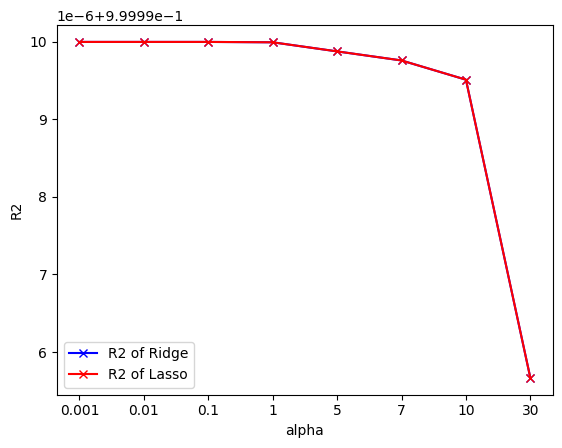

In [85]:
import matplotlib.pyplot as plt

plt.plot(range(len(alpha)),ridge_result,'-xb',label = 'R2 of Ridge')
plt.plot(range(len(alpha)),lasso_result,'-xr',label = 'R2 of Lasso')
plt.xticks(range(len(alpha)),alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend()
plt.show()

In [ ]:
def regulation_compare(alpha,model_name):
    df2 = pd.DataFrame()
    for a in alpha:
        print('회귀모형: ',model_name)
        print('알파값: ', a)

        if model_name == 'Ridge':
            model = Ridge(alpha=a)
        elif model_name == 'Lasso':
            model = Lasso(alpha=a)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=a, l1_ratio=0.5)

In [56]:
def regulation_compare(alpha,model_name):
    df2 = pd.DataFrame()
    for a in alpha:
        print('회귀모형: ',model_name)
        print('알파값: ', a)

        if model_name == 'Ridge':
            model = Ridge(alpha=a)
        elif model_name == 'Lasso':
            model = Lasso(alpha=a)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=a, l1_ratio=0.5)

        model.fit (X_train,y_train)
        r_square = model.score(X_test,y_test)
        print(f'결정계수: {r_square:.3f}')
        weight = { f:w for f,w in zip(df.columns.values[:6], model.coef_)}

        y_hat = model.predict(X_test)
        mse = mean_squared_error(y_test,y_hat)
        rmse = np.sqrt(mse)
        print(f'RMSE: {rmse:.3f}')
        print('-'*50)

        df2['alpha = '+str(a)] = pd.Series(weight)

    return(df2)

In [57]:
alpha = [0.07,0.1,0.5,1.3]
regulation_compare(alpha,'Lasso')

회귀모형:  Lasso
알파값:  0.07
결정계수: 1.000
RMSE: 0.070
--------------------------------------------------
회귀모형:  Lasso
알파값:  0.1
결정계수: 1.000
RMSE: 0.100
--------------------------------------------------
회귀모형:  Lasso
알파값:  0.5
결정계수: 0.999
RMSE: 0.499
--------------------------------------------------
회귀모형:  Lasso
알파값:  1.3
결정계수: 0.991
RMSE: 1.299
--------------------------------------------------


,alpha = 0.07,alpha = 0.1,alpha = 0.5,alpha = 1.3
Chest,0.000000,0.000000,0.000000,0.000000
Height,0.000000,0.000000,0.000000,0.000000
Waist,0.000000,0.000000,0.000000,0.000000
Head,0.000000,0.000000,0.000000,0.000000
Foot,0.000000,0.000000,0.000000,0.000000
Weight,13.729658,13.699673,13.299872,12.500268


In [58]:
alpha = [0,1,5,10,100]
regulation_compare(alpha,'Ridge')

회귀모형:  Ridge
알파값:  0
결정계수: 1.000
RMSE: 0.000
--------------------------------------------------
회귀모형:  Ridge
알파값:  1
결정계수: 1.000
RMSE: 0.001
--------------------------------------------------
회귀모형:  Ridge
알파값:  5
결정계수: 1.000
RMSE: 0.005
--------------------------------------------------
회귀모형:  Ridge
알파값:  10
결정계수: 1.000
RMSE: 0.010
--------------------------------------------------
회귀모형:  Ridge
알파값:  100
결정계수: 1.000
RMSE: 0.094
--------------------------------------------------


,alpha = 0,alpha = 1,alpha = 5,alpha = 10,alpha = 100
Chest,4.288736e-14,0.001378,0.006881,0.013740,0.133558
Height,7.734253e-15,0.000442,0.002207,0.004408,0.042863
Waist,9.851937e-15,0.001158,0.005783,0.011549,0.112503
Head,-1.524249e-16,0.000071,0.000355,0.000709,0.007018
Foot,6.209395e-15,0.000119,0.000594,0.001187,0.011652
Weight,1.379962e+01,13.796790,13.785473,13.771365,13.524288


In [59]:
alpha = [0,1,5,10,100]
regulation_compare(alpha,'ElasticNet')

회귀모형:  ElasticNet
알파값:  0
결정계수: 1.000
RMSE: 0.003
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  1
결정계수: 0.929
RMSE: 3.664
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  5
결정계수: 0.642
RMSE: 8.255
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  10
결정계수: 0.363
RMSE: 11.004
--------------------------------------------------
회귀모형:  ElasticNet
알파값:  100
결정계수: -0.000
RMSE: 13.792
--------------------------------------------------


,alpha = 0,alpha = 1,alpha = 5,alpha = 10,alpha = 100
Chest,-0.003427,3.013694,1.766635,0.925515,0.0
Height,-0.001477,0.856052,0.311993,0.000000,0.0
Waist,-0.005166,2.831860,1.699036,0.885534,0.0
Head,-0.000310,0.391326,0.209694,0.000000,0.0
Foot,-0.000508,0.461230,0.195362,0.000000,0.0
Weight,13.808151,4.954460,2.268443,1.198964,0.0
